# Lab 5-1 / Intro to ATLAS Data
### : Emulating the simple histogram example

PHYS 427\
2/25/2020 (Tue)\
Jin Kyoung Lee

In this assignment, we will emulate the simple histogram example from Jupyter notebooks (# of leptons)

In [1]:
# Importing libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

### - Using the same data used in example notebook

In [2]:
# Importing root file
test = uproot.open("ATLAS_13TeV_2020/test.root")
# test.root: this is the root file (13TeV) used in the simple histograms example

In [3]:
test.keys()

[b'mini;1']

In [4]:
test_tree = test["mini"]

In [5]:
test_tree.keys()

[b'runNumber',
 b'eventNumber',
 b'channelNumber',
 b'mcWeight',
 b'scaleFactor_PILEUP',
 b'scaleFactor_ELE',
 b'scaleFactor_MUON',
 b'scaleFactor_PHOTON',
 b'scaleFactor_TAU',
 b'scaleFactor_BTAG',
 b'scaleFactor_LepTRIGGER',
 b'scaleFactor_PhotonTRIGGER',
 b'trigE',
 b'trigM',
 b'trigP',
 b'lep_n',
 b'lep_truthMatched',
 b'lep_trigMatched',
 b'lep_pt',
 b'lep_eta',
 b'lep_phi',
 b'lep_E',
 b'lep_z0',
 b'lep_charge',
 b'lep_type',
 b'lep_isTightID',
 b'lep_ptcone30',
 b'lep_etcone20',
 b'lep_trackd0pvunbiased',
 b'lep_tracksigd0pvunbiased',
 b'met_et',
 b'met_phi',
 b'jet_n',
 b'jet_pt',
 b'jet_eta',
 b'jet_phi',
 b'jet_E',
 b'jet_jvt',
 b'jet_trueflav',
 b'jet_truthMatched',
 b'jet_MV2c10',
 b'photon_n',
 b'photon_truthMatched',
 b'photon_trigMatched',
 b'photon_pt',
 b'photon_eta',
 b'photon_phi',
 b'photon_E',
 b'photon_isTightID',
 b'photon_ptcone30',
 b'photon_etcone20',
 b'photon_convType',
 b'tau_n',
 b'tau_pt',
 b'tau_eta',
 b'tau_phi',
 b'tau_E',
 b'tau_isTightID',
 b'tau_tru

In [6]:
test_lep_num = test_tree.array("lep_n") # lep_n: number of pre-selected leptons

In [7]:
# Plotting histogram
def hist(lep_num, binNum): # Defining function for plotting histogram
    plt.figure(figsize = (10, 5))
    sns.distplot(lep_num, kde = False, bins = binNum)
    plt.title("\nNumber of leptons\n")
    plt.show()
    print("\nEntries:", len(lep_num), "| Mean:", np.mean(lep_num), "| Std:", np.std(lep_num))

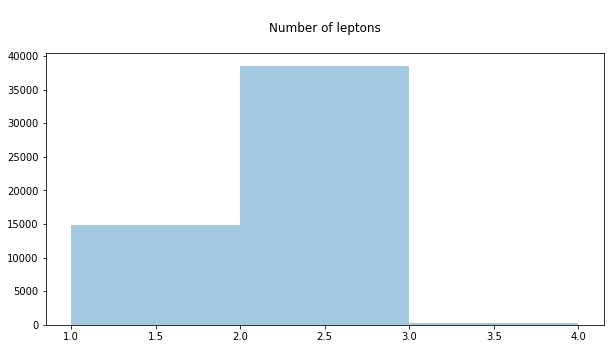


Entries: 53653 | Mean: 1.7270982051329842 | Std: 0.45591378387840964


In [8]:
# Plotting histogram of number of leptons
hist(test_lep_num,3)

In [9]:
# Normalization of data
norm = preprocessing.normalize(test_lep_num.reshape(-1,1))

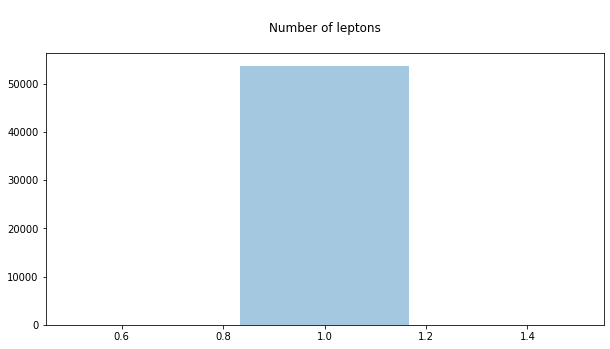


Entries: 53653 | Mean: 1.0 | Std: 0.0


In [10]:
# Plotting histogram of normalized data
hist(norm, 3)

### - Using downloaded data (other than the one used in example notebook)

In [11]:
lep4_C = uproot.open("ATLAS_13TeV_2020/4lep/4lep/data/data_C.4lep.root")
# data_C.4lep.root: ATLAS 13 TeV samples collection at least four leptons (electron or muon),
# for 2020 Open Data release; ..4lep/Data/data_C.4lep.root (http://opendata.cern.ch/record/15005)
lep4_C.keys()

[b'mini;1']

In [12]:
lep4_C_tree = lep4_C["mini"]

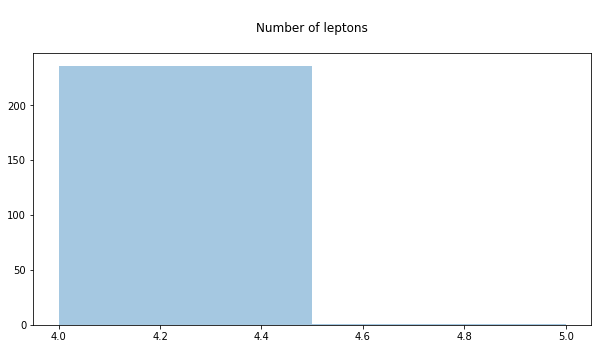


Entries: 237 | Mean: 4.0042194092827 | Std: 0.06481979534066336


In [13]:
lep4_C_lep_num = lep4_C_tree.array("lep_n")
hist(lep4_C_lep_num, 2)

In [14]:
norm_lep4 = preprocessing.normalize(lep4_C_lep_num.reshape(-1,1))

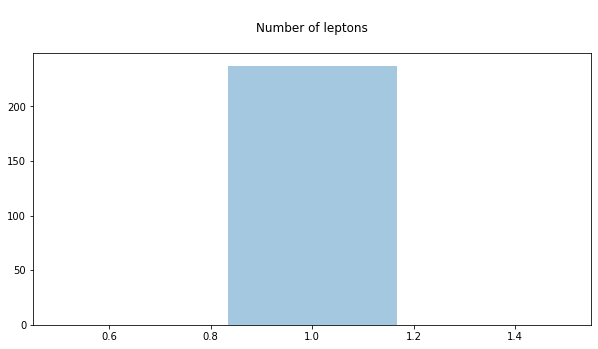


Entries: 237 | Mean: 1.0 | Std: 0.0


In [15]:
hist(norm_lep4, 3)